In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
import re, time
from nltk.stem.porter import PorterStemmer

In [5]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import json
import tensorflow as tf
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten
from tensorflow.keras.models import Sequential
import os

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
df1 = pd.read_json('/content/drive/MyDrive/data/Sarcasm/Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [9]:
df1[:10]

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [10]:
df1.shape

(28619, 3)

In [11]:
print(df1.isnull().any(axis = 0))

is_sarcastic    False
headline        False
article_link    False
dtype: bool


In [12]:
df2 = pd.read_json('/content/drive/MyDrive/data/Sarcasm/Sarcasm_Headlines_Dataset.json', lines = True)

In [13]:
df2[:10]

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [14]:
df2.shape

(26709, 3)

In [15]:
print(df2.isnull().any(axis = 0))

article_link    False
headline        False
is_sarcastic    False
dtype: bool


In [16]:
df = pd.concat([df1, df2], axis=0)
df[:10]

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [17]:
df.shape

(55328, 3)

In [18]:
print(df.isnull().any(axis = 0))

is_sarcastic    False
headline        False
article_link    False
dtype: bool


In [19]:
# Relacing special symbols and digits in headline column
# re stands for Regular Expression
df['headline'] = df['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))

In [20]:
# getting features and labels
features = df['headline']
labels = df['is_sarcastic']

In [21]:
# Stemming our data
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x: ' '.join([ps.stem(word) for word in x]))

In [22]:
# vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [23]:
# getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .05, random_state = 0)

In [28]:
df.tail()

,is_sarcastic,headline,article_link
26704,0,american politics in moral free fall,https://www.huffingtonpost.com/entry/american-...
26705,0,america s best hikes,https://www.huffingtonpost.com/entry/americas-...
26706,0,reparations and obama,https://www.huffingtonpost.com/entry/reparatio...
26707,0,israeli ban targeting boycott supporters raise...,https://www.huffingtonpost.com/entry/israeli-b...
26708,0,gourmet gifts for the foodie,https://www.huffingtonpost.com/entry/gourmet-g...


In [29]:
df.tail()

,is_sarcastic,headline,article_link
26704,0,american politics in moral free fall,https://www.huffingtonpost.com/entry/american-...
26705,0,america s best hikes,https://www.huffingtonpost.com/entry/americas-...
26706,0,reparations and obama,https://www.huffingtonpost.com/entry/reparatio...
26707,0,israeli ban targeting boycott supporters raise...,https://www.huffingtonpost.com/entry/israeli-b...
26708,0,gourmet gifts for the foodie,https://www.huffingtonpost.com/entry/gourmet-g...


In [30]:
df.duplicated().sum()

26711

In [31]:
df.drop_duplicates(subset=['headline'], inplace = True)
df.duplicated().sum()

0

In [32]:
df.describe(include = 'all')

,is_sarcastic,headline,article_link
count,28485.000000,28485,28485
unique,NaN,28485,28485
top,NaN,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
freq,NaN,1,1
mean,0.475759,NaN,NaN
std,0.499421,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [33]:
df['headline'][10]

'this lesbian is considered a father in indiana  and an amazing one at that '

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_sarcastic', ylabel='count'>

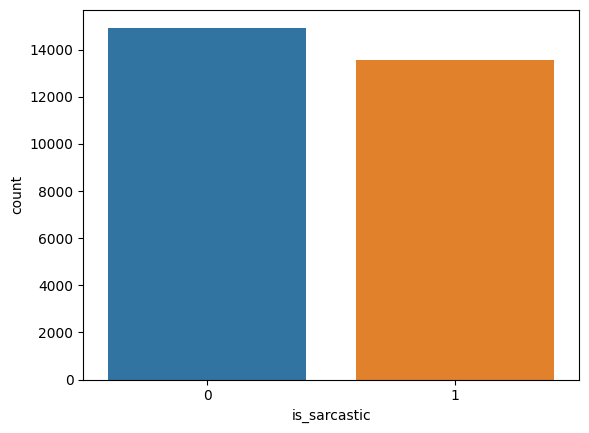

In [35]:
sns.countplot(x = "is_sarcastic", data = df)

Text(0.5, 1.0, 'Not Sarcastic text length')

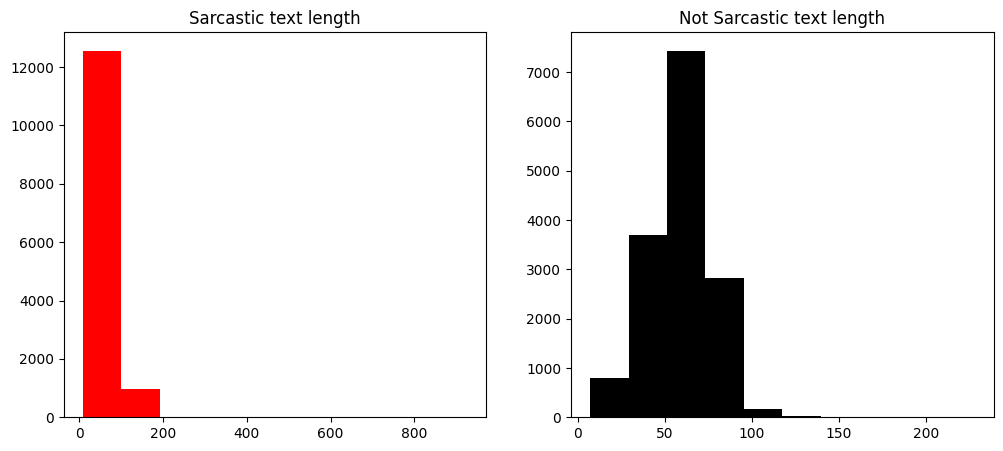

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
text_len=df[df['is_sarcastic']==1]['headline'].apply(len)
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text length')
text_len=df[df['is_sarcastic']==0]['headline'].apply(len)
ax2.hist(text_len,color='black')
ax2.set_title('Not Sarcastic text length' )

Text(0.5, 1.0, 'Not Sarcastic text word count')

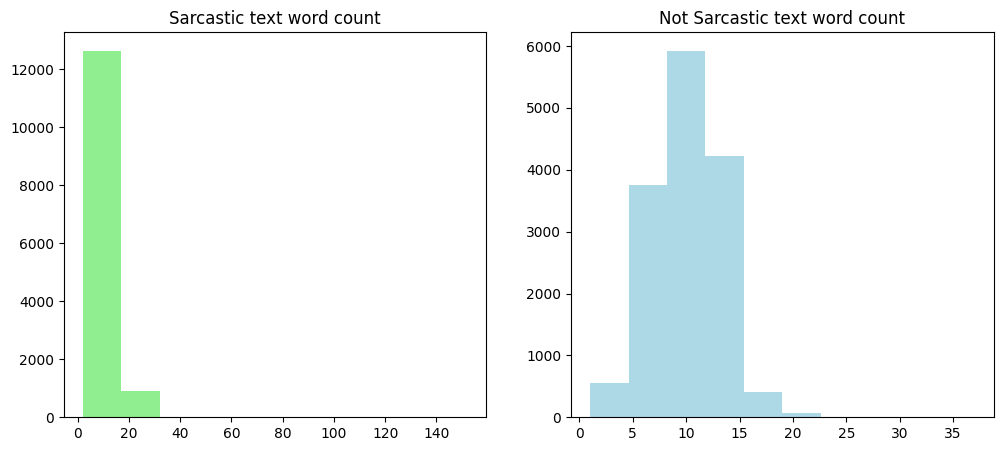

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='lightgreen')
ax1.set_title('Sarcastic text word count')
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='lightblue')
ax2.set_title('Not Sarcastic text word count')

# PREPROCESSING

In [38]:
df['cleaned_headline'] = df['headline'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))
df['cleaned_headline'] = df['cleaned_headline'].apply(lambda x: re.sub('\s+', ' ', x).strip())
print(df['cleaned_headline'])

0        thirtysomething scientists unveil doomsday clo...
1        dem rep totally nails why congress is falling ...
2           eat your veggies deliciously different recipes
3        inclement weather prevents liar from getting t...
4        mother comes pretty close to using word stream...
                               ...                        
28614         jews to celebrate rosh hashasha or something
28615    internal affairs investigator disappointed con...
28616    the most beautiful acceptance speech this week...
28617    mars probe destroyed by orbiting spielberg gat...
28618                   dad clarifies this not a food stop
Name: cleaned_headline, Length: 28485, dtype: object


In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Download the stopwords corpus
nltk.download('stopwords')

# ... your code ...

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

df['final_text'] = df['cleaned_headline'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x.lower()) if word not in stop_words]))
df['final_text']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        thirtysometh scientist unveil doomsday clock h...
1        dem rep total nail congress fall short gender ...
2                            eat veggi delici differ recip
3                  inclement weather prevent liar get work
4         mother come pretti close use word stream correct
                               ...                        
28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci g...
28616          beauti accept speech week came queer korean
28617    mar probe destroy orbit spielberg gate space p...
28618                                dad clarifi food stop
Name: final_text, Length: 28485, dtype: object

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download necessary NLTK resources (if not already downloaded)
nltk.download('stopwords')  # Download stopwords (if not already downloaded)

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Assuming 'df' is your DataFrame and 'cleaned_headline' is a column containing the cleaned headlines
df['final_text'] = df['cleaned_headline'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x.lower()) if word not in stop_words]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
import collections

words = []  # List to store individual words from headlines

for text in df['headline']:
    words.extend(text.split())

word_count = collections.Counter(words)  # Count the occurrences of each word
top_words = dict(word_count.most_common(10))  # Get the top 10 most common words

# Continue with the rest of your code (e.g., plotting)
plt.style.use('dark_background')

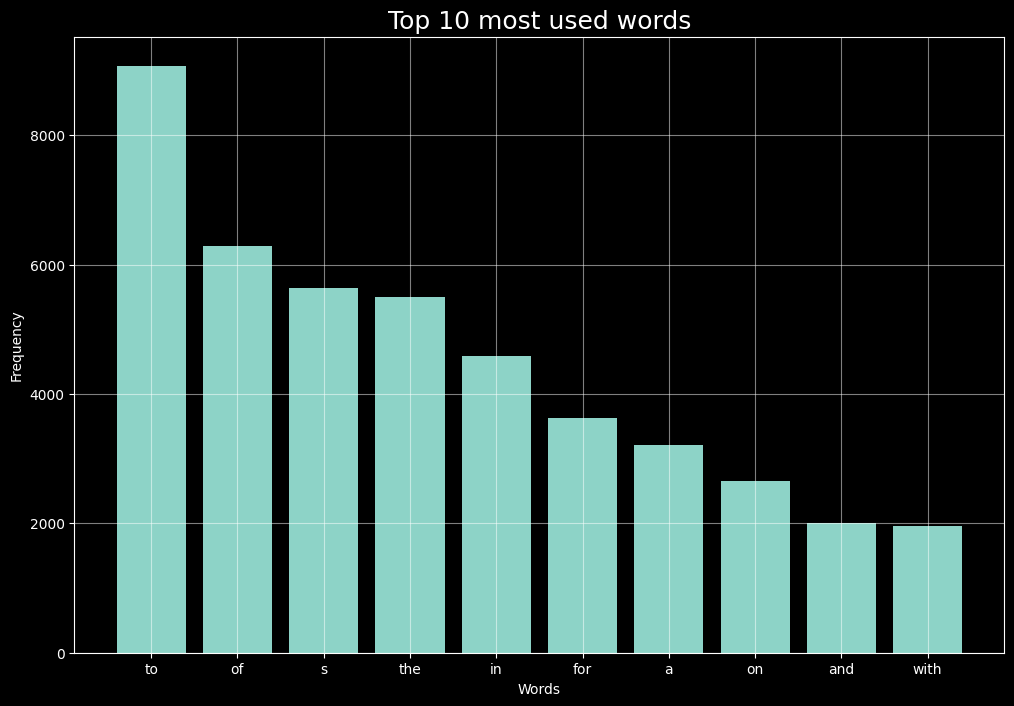

In [43]:
words = []
for text in df['headline']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

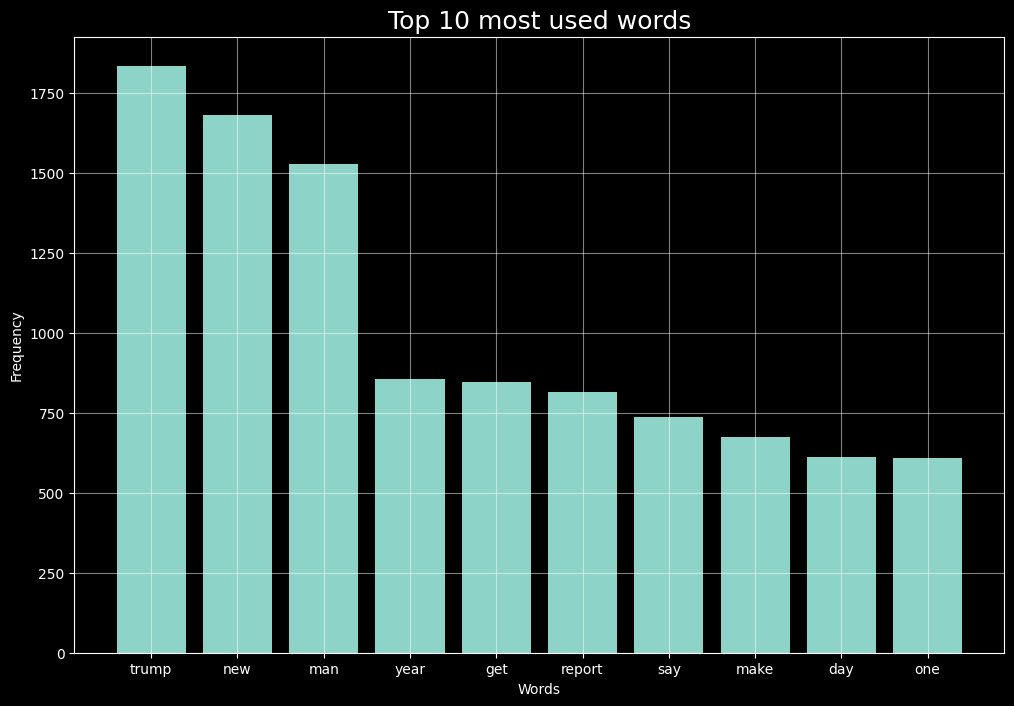

In [44]:
words = []
for text in df['final_text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

# LABEL AND SENTENCES

In [45]:
labels = np.array(df.is_sarcastic)
sentences = np.array(df.final_text)
print('Number of sentences and labels: ', len(labels), len(sentences))

Number of sentences and labels:  28485 28485


In [46]:
sentences

array(['thirtysometh scientist unveil doomsday clock hair loss',
       'dem rep total nail congress fall short gender racial equal',
       'eat veggi delici differ recip', ...,
       'beauti accept speech week came queer korean',
       'mar probe destroy orbit spielberg gate space palac',
       'dad clarifi food stop'], dtype=object)

In [47]:
labels

array([1, 0, 0, ..., 0, 1, 1])

In [48]:
from wordcloud import WordCloud  # Import the WordCloud class

text = ' '.join(caption for caption in df['final_text'])

wordcloud = WordCloud(width=800, height=500, background_color='black', min_font_size=10).generate(text)

# Continue with the rest of your code

# WORD GRAPH

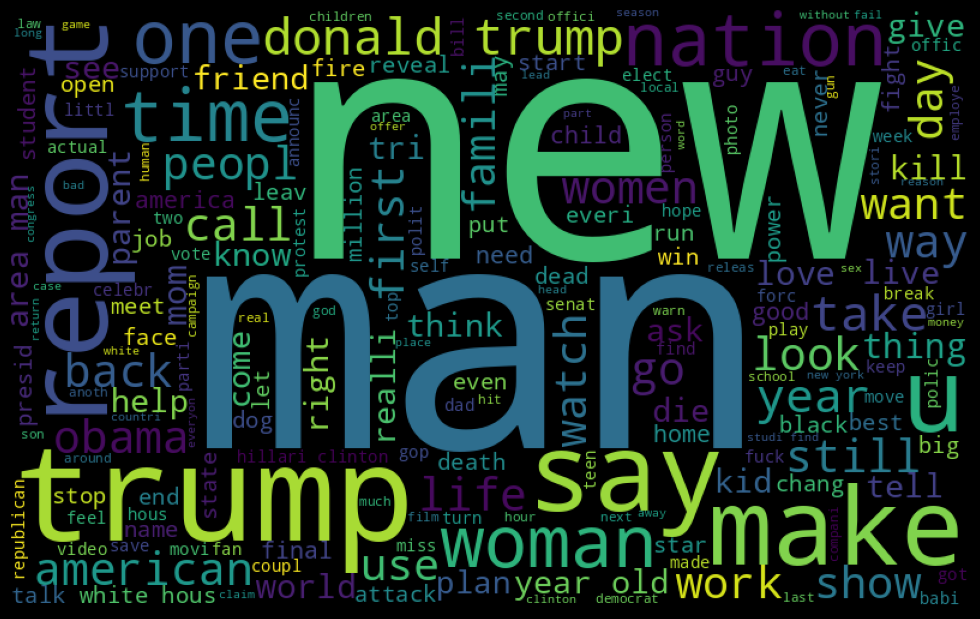

In [49]:
text = ' '.join(caption for caption in df['final_text'])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'black',
                min_font_size = 10).generate(text)

plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


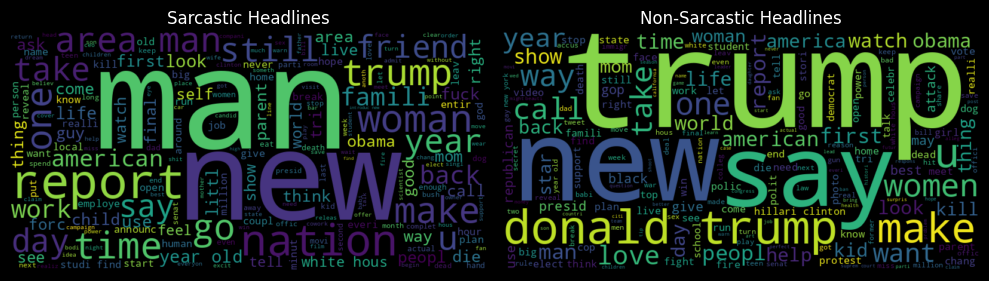

In [50]:
sarcastic_text = ' '.join(df[df['is_sarcastic'] == 1]['final_text'])
non_sarcastic_text = ' '.join(df[df['is_sarcastic'] == 0]['final_text'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
wordcloud_sarcastic = WordCloud(width=800, height=400).generate(sarcastic_text)
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.title('Sarcastic Headlines')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_non_sarcastic = WordCloud(width=800, height=400).generate(non_sarcastic_text)
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.title('Non-Sarcastic Headlines')
plt.axis('off')

plt.tight_layout()
plt.show()

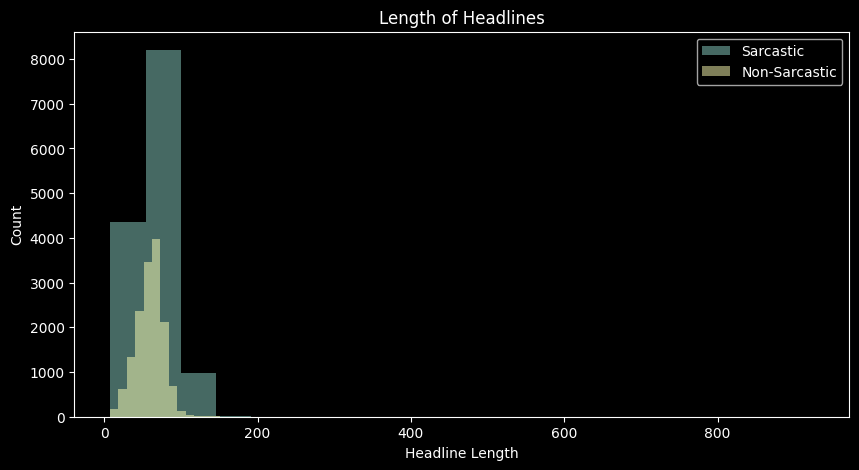

In [51]:
df['headline_length'] = df['headline'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(df[df['is_sarcastic'] == 1]['headline_length'], bins=20, alpha=0.5, label='Sarcastic')
plt.hist(df[df['is_sarcastic'] == 0]['headline_length'], bins=20, alpha=0.5, label='Non-Sarcastic')
plt.xlabel('Headline Length')
plt.ylabel('Count')
plt.legend()
plt.title('Length of Headlines')
plt.show()

# TRAIN TEST SPLIT

In [52]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2)
print('Train and Test set distribution: ', len(x_train), len(x_test), len(y_train), len(y_test))

Train and Test set distribution:  22788 5697 22788 5697


In [53]:
vocab_size = 10000
max_length = 32
embedding_dim = 32
padding_type='post'
oov_token = '<OOV>'

In [54]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

# Padding

In [55]:
train_sequences = tokenizer.texts_to_sequences(x_train)
padded_train_sequences = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type)

test_sequences = tokenizer.texts_to_sequences(x_test)
padded_test_sentences = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type)

# USING GLOVE EMBEDDINGS

In [59]:
embedding_dim = 100

# Load pre-trained GloVe embeddings
embeddings_index = {}
with open('/content/drive/MyDrive/Final Project/Model/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

# Create an embedding matrix
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define the model architecture

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# ... continue with the rest of your code ...


# Compile the model

In [61]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001  # Specify your desired learning rate

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           1590400   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,632,705
Trainable params: 42,305
Non-trainable params: 1,590,400
_________________________________________________________________


# Train the model

In [63]:
history = model.fit(padded_train_sequences, y_train, epochs=10, validation_data=(padded_test_sentences, y_test), batch_size=32)

Epoch 1/10
713/713 [==============================] - 21s 26ms/step - loss: 0.6031 - accuracy: 0.6725 - val_loss: 0.5691 - val_accuracy: 0.6965
Epoch 2/10
713/713 [==============================] - 20s 28ms/step - loss: 0.5331 - accuracy: 0.7367 - val_loss: 0.5481 - val_accuracy: 0.7260
Epoch 3/10
713/713 [==============================] - 24s 34ms/step - loss: 0.4898 - accuracy: 0.7636 - val_loss: 0.5234 - val_accuracy: 0.7330
Epoch 4/10
713/713 [==============================] - 20s 28ms/step - loss: 0.4562 - accuracy: 0.7842 - val_loss: 0.4988 - val_accuracy: 0.7593
Epoch 5/10
713/713 [==============================] - 21s 30ms/step - loss: 0.4297 - accuracy: 0.8004 - val_loss: 0.4869 - val_accuracy: 0.7639
Epoch 6/10
713/713 [==============================] - 26s 37ms/step - loss: 0.4031 - accuracy: 0.8177 - val_loss: 0.4797 - val_accuracy: 0.7713
Epoch 7/10
713/713 [==============================] - 24s 33ms/step - loss: 0.3792 - accuracy: 0.8306 - val_loss: 0.4938 - val_accuracy:

# EVALUATION

In [64]:
def plot_graphs(history, string):
    plt.style.use('seaborn')
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

<ipython-input-64-0eaccd91cf8b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


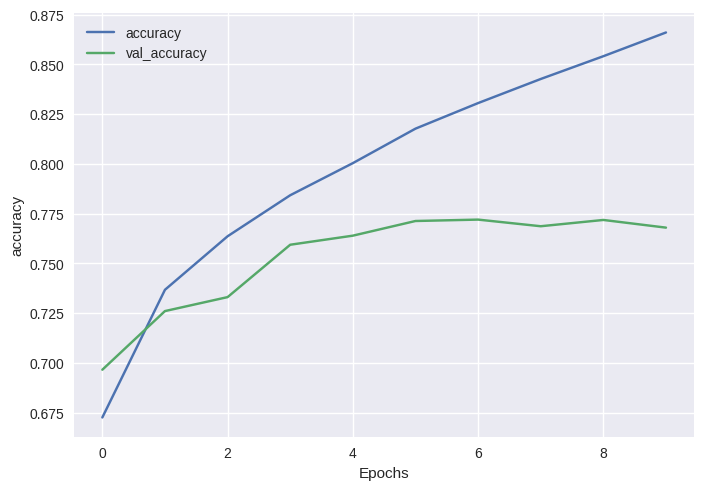

In [65]:
plot_graphs(history, "accuracy")

<ipython-input-64-0eaccd91cf8b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


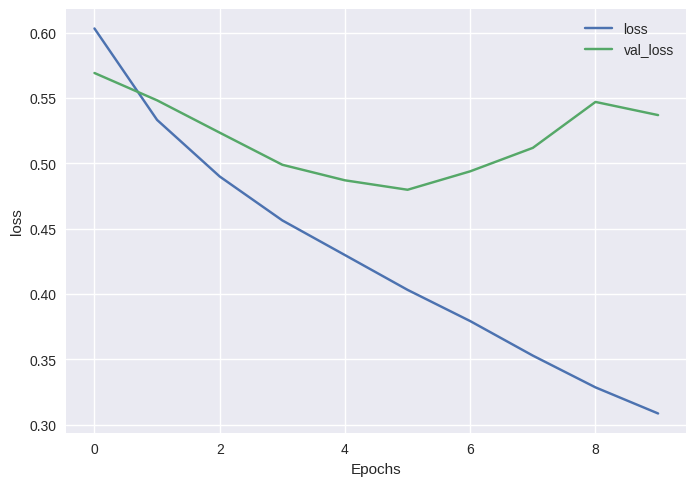

In [66]:
plot_graphs(history, "loss")

In [67]:
print('Accuracy on test set: ', model.evaluate(padded_test_sentences,y_test)[1]*100)

179/179 [==============================] - 1s 8ms/step - loss: 0.5368 - accuracy: 0.7679
Accuracy on test set:  76.79480314254761


In [68]:
preds = model.predict(padded_test_sentences).flatten()
y_predict = []
for i in preds:
    if i < 0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)
y_predict[:5]

179/179 [==============================] - 2s 8ms/step


[0, 0, 0, 0, 0]

# CLASSIFICATION REPORT

In [69]:
from sklearn.metrics import classification_report

# ... your code ...

print(classification_report(y_test, y_predict, target_names=['Not Sarcastic', 'Sarcastic']))


               precision    recall  f1-score   support

Not Sarcastic       0.80      0.75      0.78      3048
    Sarcastic       0.73      0.79      0.76      2649

     accuracy                           0.77      5697
    macro avg       0.77      0.77      0.77      5697
 weighted avg       0.77      0.77      0.77      5697



# Confusion Matrix

In [70]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[2287  761]
 [ 561 2088]]


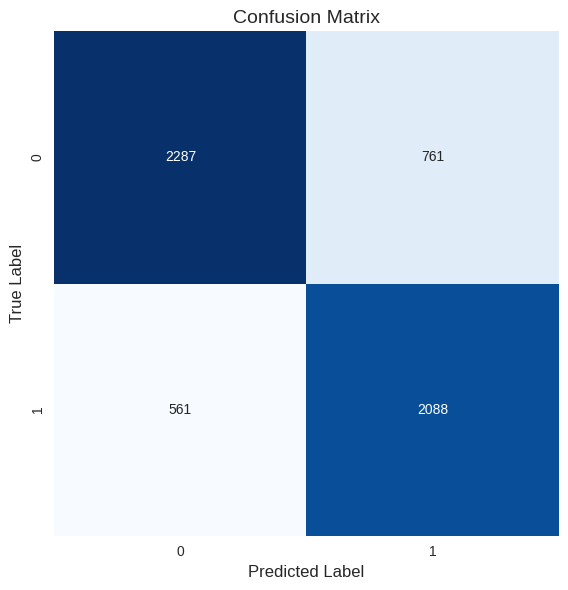

In [71]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
heatmap.set_xlabel('Predicted Label', fontsize=12)
heatmap.set_ylabel('True Label', fontsize=12)
heatmap.set_title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()

179/179 [==============================] - 2s 11ms/step


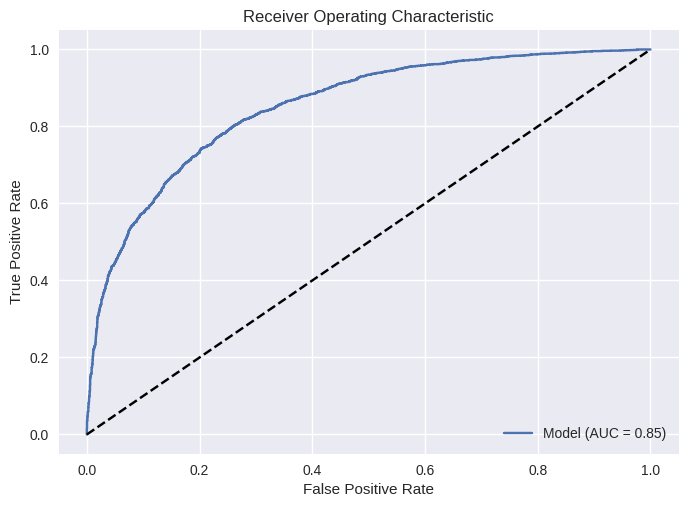

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
preds = model.predict(padded_test_sentences).flatten()
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc_roc = roc_auc_score(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='Model (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Make predictions

In [73]:
new_sentence = "this is bullshit."
# Preprocess the new sentence
new_sequence = tokenizer.texts_to_sequences([new_sentence])
padded_new_sequence = pad_sequences(new_sequence, maxlen=max_length, padding=padding_type)
predictions = model.predict(padded_new_sequence)
labels = ['Not Sarcastic', 'Sarcastic']
predicted_label = labels[int(round(predictions[0][0]))]
print(f"The predicted label for the sentence '{new_sentence}' is: {predicted_label}")

1/1 [==============================] - 0s 87ms/step
The predicted label for the sentence 'this is bullshit.' is: Not Sarcastic


In [74]:
sentences = [
    "I'm loving this weather!",
    "Wow, you're really good at pointing out the obvious. I never would have figured that out on my own.",
    "Oh, great. Another meeting.",
    "Sure, I'd love to work on the weekend.",
    "Sure, I'd love to work on the weekend. It's not like I have a life outside of the office.",
    "Wow, what a brilliant idea!",
    "I totally believe you.",
    "I'm so excited to do chores all day.",
    "Oh, look who's the expert now! I'm in awe of your vast knowledge on a subject you know nothing about",
]

# Preprocess and predict sarcasm for each sentence
for sentence in sentences:
    new_sequence = tokenizer.texts_to_sequences([sentence])
    padded_new_sequence = pad_sequences(new_sequence, maxlen=max_length, padding=padding_type)
    predictions = model.predict(padded_new_sequence)
    predicted_label = labels[int(round(predictions[0][0]))]
    print(f"The predicted label for the sentence '{sentence}' is: {predicted_label}")


1/1 [==============================] - 0s 66ms/step
The predicted label for the sentence 'I'm loving this weather!' is: Not Sarcastic
1/1 [==============================] - 0s 85ms/step
The predicted label for the sentence 'Wow, you're really good at pointing out the obvious. I never would have figured that out on my own.' is: Sarcastic
1/1 [==============================] - 0s 89ms/step
The predicted label for the sentence 'Oh, great. Another meeting.' is: Not Sarcastic
1/1 [==============================] - 0s 90ms/step
The predicted label for the sentence 'Sure, I'd love to work on the weekend.' is: Not Sarcastic
1/1 [==============================] - 0s 35ms/step
The predicted label for the sentence 'Sure, I'd love to work on the weekend. It's not like I have a life outside of the office.' is: Sarcastic
1/1 [==============================] - 0s 26ms/step
The predicted label for the sentence 'Wow, what a brilliant idea!' is: Not Sarcastic
1/1 [==============================] - 0s 29